In [22]:
# Mapa

a = np.arange(-0.6,2,0.01)
X = []
for alpha in a:
    x = []
    xn = 0.1
    for i in range(1000):
        xn = alpha - xn**2
        x.append(xn)
    X.append(np.array(x)[300:])
    

/var/folders/_j/djvzvp5n6pscgg9ndg0432pw0000gq/T/ipykernel_81256/3797472920.py:9: RuntimeWarning: overflow encountered in scalar power
  xn = alpha - xn**2


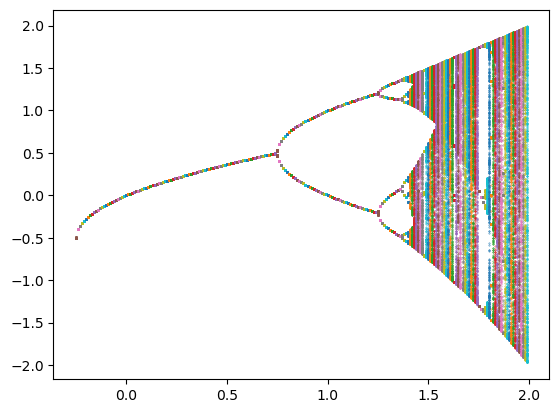

In [23]:
import matplotlib.pyplot as plt
import numpy as np


for i,alpha in enumerate(a):
    plt.scatter([alpha] * len(X[i]), X[i],s=0.1)
    

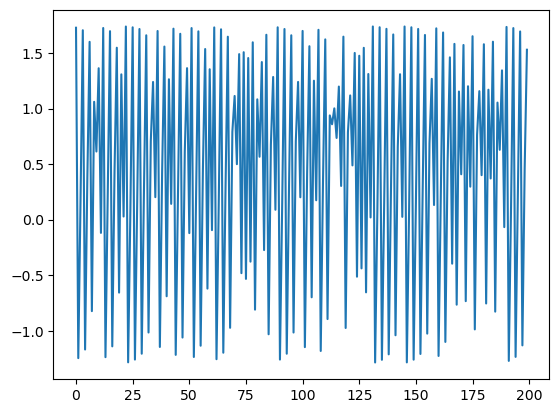

In [54]:
plt.plot(X[234][400:600])
serie_tiempo = X[234][400:600]

In [59]:
from itertools import permutations
import numpy as np

#Funcion para evaluar la permutacion a la que corresponde unna ventana
def evaluate_order(values):
    # Ordeno la lista
    sorted_values = sorted(values)
    # Mapeo los valores ordenados con su indice
    order_dict = {value: index + 1 for index, value in enumerate(sorted_values)}
    # Genero lista con permutacion 
    order = [order_dict[value] for value in values]
    return order

#Defino largo de la ventana
n = 4
#Permutaciones posibles 
permutaciones_posibles = list(permutations(np.arange(1,n+1,1)))
#Selecciono ventanas de largo n en la serie de tiempo
ventanas = [serie_tiempo[i:i+n] for i in range(len(serie_tiempo) - n + 1)]
#Evaluo la permutacion de cada ventana
permutaciones = [evaluate_order(ventana) for ventana in ventanas]

#Evaluo las probabilidades de cada permutacion posible y la guardo en un vector p_i
probabilidades = np.zeros(len(permutaciones_posibles))
for i,lista_a_contar in enumerate(permutaciones_posibles):
    # Inicializar el contador para la permutacion i
    contador = 0
    # Recorrer la lista de permutaciones de las ventanitas
    for sublista in permutaciones:
        if tuple(sublista) == lista_a_contar: 
            contador += 1      #Suma al contador cada vez que una ventanita corresponde a la permutacion i
    
    probabilidades[i] = contador/len(permutaciones_posibles) #Calcula la probabilidad de la permutacion i


#Evaluo H normalizada
p = np.array(probabilidades)

H = -sum(p*np.log(p))/np.log(n)


/var/folders/_j/djvzvp5n6pscgg9ndg0432pw0000gq/T/ipykernel_81256/2052802357.py:38: RuntimeWarning: divide by zero encountered in log
  H = -sum(p*np.log(p))/np.log(n)
/var/folders/_j/djvzvp5n6pscgg9ndg0432pw0000gq/T/ipykernel_81256/2052802357.py:38: RuntimeWarning: invalid value encountered in multiply
  H = -sum(p*np.log(p))/np.log(n)


In [60]:
np.log(p)

/var/folders/_j/djvzvp5n6pscgg9ndg0432pw0000gq/T/ipykernel_81256/87274877.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(p)


array([       -inf,        -inf, -0.5389965 ,  0.40546511,        -inf,
              -inf,        -inf,        -inf, -0.40546511,        -inf,
        0.73396918,        -inf,        -inf,        -inf,        -inf,
        0.22314355,        -inf,        -inf,  0.43286408, -0.5389965 ,
              -inf,        -inf,        -inf,        -inf])